# Editing Features

The ArcGIS API for Python makes programmatic editing of features a breeze. The `edit_features()` method on `FeatureLayer` object can be used for the same. In the example below, we see how to add, update and delete features from a point feature layer

In [ ]:
#connect to GIS
from arcgis.gis import GIS
from IPython.display import display
gis = GIS("portal url", 'username', 'password')

<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>
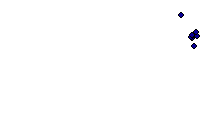

In [ ]:
#search for the feature layer named Ports along west coast
search_result = gis.content.search('title:Ports along west coast')
search_result[0]

In [ ]:
#access the item's feature layers
ports_item = search_result[0]
ports_layers = ports_item.layers
ports_layers

[<FeatureLayer url:"http://Dev003246.esri.com/server/rest/services/Hosted/Ports_along_west_coast/FeatureServer/0">]

## Query the features
Let us query the features on this layer

In [ ]:
#query all the features and display it on a map
ports_fset = ports_layers[0].query() #an empty query string will return all 
                                        #the features or the first 1000 which ever is smaller

The `df` property of `FeatureSet` class is a powerful way to visualize all the features as a pandas dataframe table.

In [ ]:
ports_fset.df

,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry.x,geometry.y
objectid,,,,,,,,,,
1,US,{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF},L,SW,37.816667,-122.416667,SAN FRANCISCO,SFFO,-1.362736e+07,4.553559e+06
2,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-1.361066e+07,4.548863e+06
3,US,{A6A21CC3-DE52-4B8A-A5B2-1CAA726E7F02},L,SW,37.816667,-122.333333,OAKLAND,OAK,-1.361808e+07,4.553559e+06
4,US,{265AD7A6-4F59-4181-88DE-194F23F64E92},S,SW,37.916667,-122.366667,POINT RICHMOND,RIC,-1.362180e+07,4.567660e+06
5,US,{B15D545F-83DD-4D3E-9051-6D9F290A8E9E},S,SW,38.100000,-122.266667,MARE ISLAND,None,-1.361066e+07,4.593562e+06
6,US,{A97E8B59-1E25-416E-9206-4B59A869E2F4},S,SW,38.083333,-122.250000,SOUTH VALLEJO,None,-1.360881e+07,4.591205e+06
7,US,{8EB57C5B-100B-4C50-B6B1-4D6B9B1C7545},S,SW,37.950000,-121.300000,STOCKTON,SCK,-1.350305e+07,4.572365e+06
8,US,{3B7B126E-0B60-49AF-89AA-4AC05402CFEA},S,SW,38.583333,-121.500000,SACRAMENTO,SMF,-1.352532e+07,4.662162e+06
9,US,{20378B4B-3E9E-47D2-AF42-4F0A31D5CA66},S,SW,40.800000,-124.183333,EUREKA,ACV,-1.382403e+07,4.982886e+06


## Check if the layer can be edited
To enable a feature layer to be edited, the `edit` capability needs to be turned on. This can be verified by accessing the `capabilities` property on the `FeatureLayer` object:

In [ ]:
ports_flayer = ports_layers[0]
ports_flayer.properties.capabilities

'Create,Editing,Query,Update,Uploads,Delete,Sync,Extract'

## Editing features

The feature layer does have all editing, updating and deleting capabilities turned on, thus it is ready for edit operations.

### Updating features
From the dataframe above, we notice the short_form field of San Francisco port has a typo. We can update this by calling the `edit_features()` method on the `ports_flayer` `FeatureLayer` object. The `edit_features()` method accepts a `Feature` object with correct parameters set.

In [ ]:
ports_features = ports_fset.features

# select San Francisco feature
sfo_feature = [f for f in ports_features if f.attributes['port_name']=='SAN FRANCISCO'][0]
sfo_feature.attributes

{'country': 'US',
 'globalid': '{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF}',
 'harborsize': 'L',
 'label_position': 'SW',
 'latitude': 37.816667,
 'longitude': -122.416667,
 'objectid': 1,
 'port_name': 'SAN FRANCISCO',
 'short_form': 'SFFO'}

As we can see above, the `short_form` attribute should be changed to `SFO`. Let us edit that and store it as a new `Feature` object

In [ ]:
sfo_edit = sfo_feature
sfo_edit.attributes['short_form'] = 'SFO'

In [ ]:
display(sfo_edit)

{"attributes": {"latitude": 37.816667, "longitude": -122.416667, "country": "US", "harborsize": "L", "label_position": "SW", "objectid": 1, "globalid": "{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF}", "port_name": "SAN FRANCISCO", "short_form": "SFO"}, "geometry": {"x": -13627361.034999996, "y": 4553559.283399999}}

Now let us send this feature object to the `edit_features()` method and edit the original feature layer

In [ ]:
update_result = ports_flayer.edit_features(updates=[sfo_edit])
update_result

{'addResults': [],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [],
 'updateResults': [{'globalId': '{14FB62C9-1CEA-4F12-ACA4-14BB72F042BF}',
   'objectId': 1,
   'success': True}]}

### Adding features
From the data frame, we also notice that 'Los Angeles', an important port is missing. We can add this to the original layer by calling the `edit_features()` method and passing a dictionary representation of the feature

In [ ]:
# construct a Feature object for Los Angeles.
la_dict = {"attributes": 
           {"latitude": 33.75,
            "longitude": -118.25,
            "country": "US",
            "harborsize": "L",
            "label_position": "SW",
            "port_name": "LOS ANGELES",
            "short_form": "LAX"}, 
           "geometry": 
           {"x": -13044788.958999995, "y": 3857756.351200014}}

In [ ]:
add_result = ports_flayer.edit_features(adds = [la_dict])

In [ ]:
add_result

{'addResults': [{'globalId': '{02E40476-220D-41AA-91ED-E950678B0BDD}',
   'objectId': 23,
   'success': True}],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [],
 'updateResults': []}

### Deleting features
From the data frame, we notice 'Redlands', a land locked city is wrongly added as a port. We can remove it by calling the `edit_features()` method and passing the object id of the feature we want to be remove to the `deletes` parameter.

In [ ]:
# find object id for Redlands
Redlands_feature = [f for f in ports_features if f.attributes['port_name'] == 'REDLANDS'][0]
Redlands_objid = Redlands_feature.get_value('objectid')
Redlands_objid

22

In [ ]:
type(Redlands_objid)

int

In [ ]:
# pass the object id as a string to the delete parameter
delete_result = ports_flayer.edit_features(deletes=str(Redlands_objid))
delete_result

{'addResults': [],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [{'globalId': '{8AFA0145-A107-4031-B05B-1D09550E9D88}',
   'objectId': 22,
   'success': True}],
 'updateResults': []}

## Check results of edit operations
We have successfully added, removed and edited features. Let us query the layer once again and display the resutls as a dataframe and verify them.

In [ ]:
ports_fset_edited = ports_flayer.query()
ports_fset_edited.df

,country,globalid,harborsize,label_position,latitude,longitude,port_name,short_form,geometry.x,geometry.y
objectid,,,,,,,,,,
2,US,{6EE30C76-399D-42F5-B6ED-403C94DFFCD4},S,SW,37.783333,-122.266667,ALAMEDA,NGZ,-1.361066e+07,4.548863e+06
3,US,{A6A21CC3-DE52-4B8A-A5B2-1CAA726E7F02},L,SW,37.816667,-122.333333,OAKLAND,OAK,-1.361808e+07,4.553559e+06
4,US,{265AD7A6-4F59-4181-88DE-194F23F64E92},S,SW,37.916667,-122.366667,POINT RICHMOND,RIC,-1.362180e+07,4.567660e+06
5,US,{B15D545F-83DD-4D3E-9051-6D9F290A8E9E},S,SW,38.100000,-122.266667,MARE ISLAND,None,-1.361066e+07,4.593562e+06
6,US,{A97E8B59-1E25-416E-9206-4B59A869E2F4},S,SW,38.083333,-122.250000,SOUTH VALLEJO,None,-1.360881e+07,4.591205e+06
7,US,{8EB57C5B-100B-4C50-B6B1-4D6B9B1C7545},S,SW,37.950000,-121.300000,STOCKTON,SCK,-1.350305e+07,4.572365e+06
8,US,{3B7B126E-0B60-49AF-89AA-4AC05402CFEA},S,SW,38.583333,-121.500000,SACRAMENTO,SMF,-1.352532e+07,4.662162e+06
9,US,{20378B4B-3E9E-47D2-AF42-4F0A31D5CA66},S,SW,40.800000,-124.183333,EUREKA,ACV,-1.382403e+07,4.982886e+06
10,US,{782C11E0-B02D-45AB-8BAD-97C1B5817812},M,SW,43.400000,-124.283333,EMPIRE,None,-1.383516e+07,5.373055e+06


Thus, we no longer see 'Redlands' which we deleted. We see a new objectid of 23 corresponding to Los Angeles that we added. Also the short_form of San Francisco is corrected to 'SFO'.

The edits we performed on the features are persisted in the feature layer and will reflect in all clients accessing it.